In [ ]:
import torch

a = torch.tensor([1, 2, 3])
print(a, type(a))

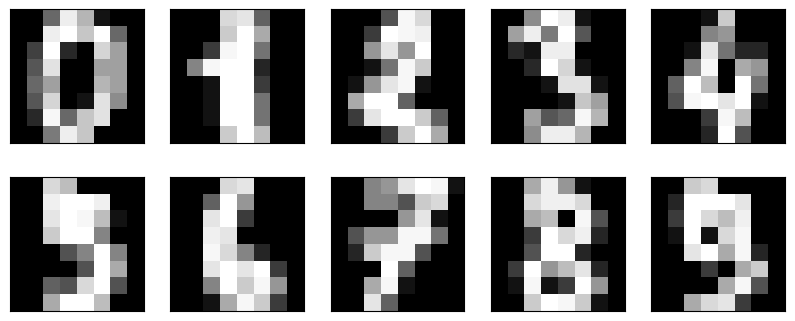

데이터의 형태:  (1797, 64)
라벨:  [0 1 2 3 4 5 6 7 8 9]


In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10  # 표시하는 이미지의 수
plt.figure(figsize=(10, 4))
for i in range(n_img):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("데이터의 형태: ", digits_data.data.shape)
print("라벨: ", digits_data.target[:n_img])

In [3]:
import torch
from sklearn.model_selection import train_test_split

# CUDA 장치 설정 (NVIDIA GPU 사용 가능)
# device = (
#     torch.device("cuda") if torch.backends.cuda.is_available() else torch.device("cpu")
# )

# MPS 장치 설정 (Apple Silicon 사용 가능)
# device = (
#     torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
# )

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

# Tensor로 변환
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)
# x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
# t_train = torch.tensor(t_train, dtype=torch.int64).to(device)
# x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
# t_test = torch.tensor(t_test, dtype=torch.int64).to(device)

In [4]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32), nn.ReLU(), nn.Linear(32, 16), nn.ReLU(), nn.Linear(16, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [5]:
from torch import optim

# 소프트맥스 함수 + 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# SGD 모델의 파리미터를 설정한다
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 손실 로그
record_loss_train = []
record_loss_test = []

# 훈련 데이터를 1000회 사용한다
for i in range(1000):
    # 파라미터의 경사를 0으로
    optimizer.zero_grad()

    # 순전파
    y_train = net(x_train)
    y_test = net(x_test)

    # 오차를 구해서 기록한다
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 역전파(경사를 계산)
    loss_train.backward()

    # 파라미터 갱신
    optimizer.step()

    if i % 100 == 0:
        print(
            "Epoch:",
            i,
            "Loss_Train:",
            loss_train.item(),
            "Loss_Test:",
            loss_test.item(),
        )

Epoch: 0 Loss_Train: 2.8917391300201416 Loss_Test: 2.9492011070251465
Epoch: 100 Loss_Train: 0.8453168869018555 Loss_Test: 0.9048902988433838
Epoch: 200 Loss_Train: 0.3651700019836426 Loss_Test: 0.4344937801361084
Epoch: 300 Loss_Train: 0.24453653395175934 Loss_Test: 0.31396737694740295
Epoch: 400 Loss_Train: 0.1881011575460434 Loss_Test: 0.2621423602104187
Epoch: 500 Loss_Train: 0.15391838550567627 Loss_Test: 0.23278173804283142
Epoch: 600 Loss_Train: 0.13010653853416443 Loss_Test: 0.2148735076189041
Epoch: 700 Loss_Train: 0.11227727681398392 Loss_Test: 0.20259203016757965
Epoch: 800 Loss_Train: 0.0983215868473053 Loss_Test: 0.19417746365070343
Epoch: 900 Loss_Train: 0.0871032252907753 Loss_Test: 0.18764430284500122


# 속도차이

- cpu: 1.4s
- mps: 3.9s
- 데이터 셋이 너무 작아서 그런가? cpu 가 더 빠르네


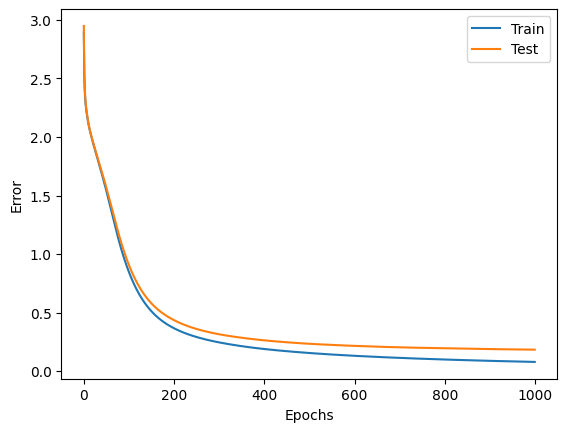

In [6]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [7]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("정답률: ", str(count / len(t_test) * 100) + "%")

정답률:  95.11111111111111%


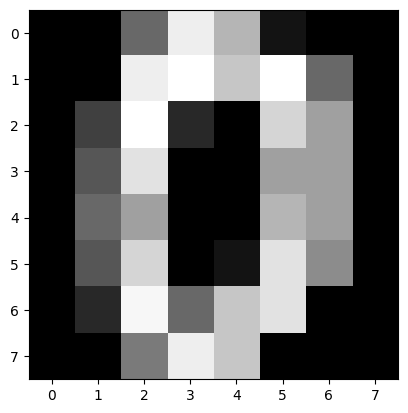

정답:  0 예측 결과:  0


In [8]:
# 입력 이미지
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("정답: ", labels[img_id], "예측 결과: ", y_pred.argmax().item())